In [25]:
# import relevant libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# read the data
data = pd.read_csv("titanic/train.csv")

In [27]:
# show the first rows of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# shows rows and columns
data.shape

(891, 12)

Survived is our dependennt variable

Important independent variabes: 
- Pclass
- Sex
- Age
- SibSp
- Parch
- Embarked (perform a correlation test)

In [29]:
new_data = data.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis = 1)

In [30]:
# replace missing values with mean value
new_data["Age"] = new_data["Age"].fillna(new_data["Age"].mean())

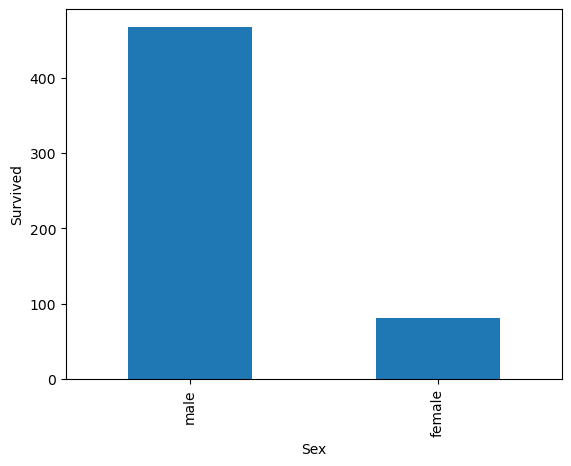

In [31]:
# plot a bar graph for male and female survivors
new_data[new_data["Survived"] == 0]["Sex"].value_counts().plot(kind = "bar")
plt.xlabel("Sex")
plt.ylabel("Survived")

plt.show()

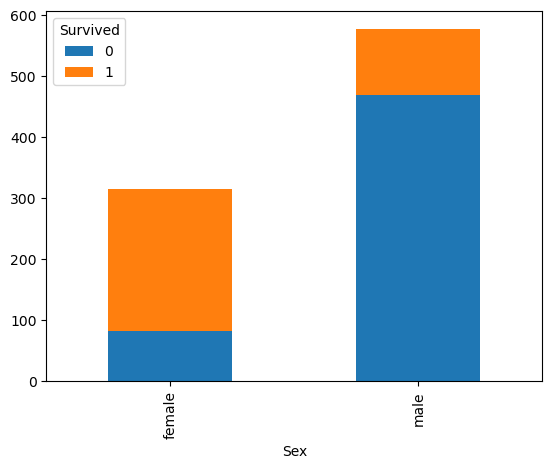

In [32]:
new_data.groupby(['Sex', 'Survived'])['Survived'].count().unstack().plot.bar(stacked=True)
plt.show()


In [33]:
# when building regression models all columns must contains numerical values only 
# rhe "sex" column contains male and female values which are text. We will assign 1 to male and 2 to female.
new_data["Sex"] = new_data["Sex"].replace({"male": 1, "female": 2})

In [34]:
# rhe "Embarked" column contains male and female values which are text. We will assign 1 to male and 2 to female.

new_data["Embarked"] = new_data["Embarked"].replace({"S": 1, "Q": 2, "C": 3})

In [35]:
# check if all column contain only numerical values
new_data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Embarked    float64
dtype: object

In [36]:
# Drop rows from Pandas dataframe with missing values or NaN in columns
new_data = new_data.dropna()

In [37]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = new_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Embarked']]
y = new_data[['Survived']]

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/Users/tmt0947/opt/anaconda3/envs/csx433env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [38]:
from sklearn.metrics import accuracy_score

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

accuracy_score(y_test, y_pred)

[1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1
 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1
 1]


0.8565022421524664

In [39]:
data_to_submit = pd.read_csv("titanic/test.csv")

In [40]:
data_to_submit.head()

id = list(data_to_submit["PassengerId"])

In [41]:
data_to_submit.shape

(418, 11)

In [42]:
data_to_submit = data_to_submit.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis = 1)
data_to_submit["Age"] = data_to_submit["Age"].fillna(data_to_submit["Age"].mean())
data_to_submit["Sex"] = data_to_submit["Sex"].replace({"male": 1, "female": 2})
data_to_submit["Embarked"] = data_to_submit["Embarked"].replace({"S": 1, "Q": 2, "C": 3})
data_to_submit = data_to_submit.dropna()

In [43]:
data_to_submit

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.50000,0,0,2
1,3,2,47.00000,1,0,1
2,2,1,62.00000,0,0,2
3,3,1,27.00000,0,0,1
4,3,2,22.00000,1,1,1
...,...,...,...,...,...,...
413,3,1,30.27259,0,0,1
414,1,2,39.00000,0,0,3
415,3,1,38.50000,0,0,1
416,3,1,30.27259,0,0,1


In [44]:
y_final = classifier.predict(data_to_submit)

In [45]:
y_final

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
submission = pd.DataFrame(
    {
        'PassengerId': id,
        'Survived': y_final
    }
)

In [47]:
submission.to_csv('submission.csv', index=False)